<a href="https://colab.research.google.com/github/MuntahaZaigham1/ds_assign2_part1-2/blob/master/polyreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import plotly

In [70]:
data = np.loadtxt('/content/polynomialRegressionData.csv', delimiter=',')
#X_train = data[:,1] #the feature_set
#y_train = data[:,2] #the labels
No_of_cols = data.shape[1]

X_train1 = data[:,No_of_cols - 3] #feature set
X_train2 = data[:,No_of_cols - 2] #feature set

y_train = data[:, No_of_cols - 1] #label set

print(X_train2)

[100. 100.  88. 100.  90.  88.  94.  90. 100. 100.   0.  59.   0.  75.
   0.  96.  92.  28.  94.  80.  25. 100. 100.  58.  77.  76.  55. 100.
  94.  85.   0.  90.  90.   0. 100.   0. 100.  50. 100.  81.  67.  97.
  38.  82.   0.   0.   0.   0.  73.  89. 100.  75.  96.  96.  46. 100.
  78.   0.   0.  87.  96.  83.  91.  93.  93.  81.  80.  95.  94.  86.
  85. 100. 100. 100.   0.  97.  95.  86.  95.  83.  80.  87.   0.   0.
  93.   0.   0.  62.  75.  94.  93.  90.  74.  83.  84.   0.  68.   0.
  75.   0.   0. 100.  90.  72.  84.  67.  80.  88.  86. 100. 100.  86.
  75.  88.  77.   0.   0. 100. 100.  96.  78.  73. 100.   0. 100.  78.
  82.  83. 100.  72.  22.  50. 100. 100. 100.  70. 100.   0.   0. 100.
   0. 100.   0.  98. 100.]


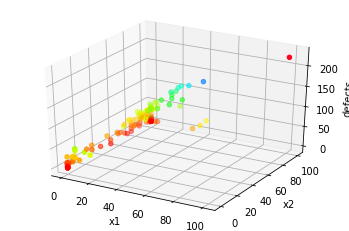

In [45]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = y_train
x_points = X_train1
y_points = X_train2
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('defects')

plt.show()

In [0]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1),dtype=np.float64)
    theta = theta.reshape(1,n+1)
    #print(theta)
    #print(x_array)
    for i in range(0,X.shape[0]):
      x_array = np.ones(n+1,dtype=np.float64)
      for j in range(0,n+1):
          x_array[j] = np.power(X[i],j)
      x_array = x_array.reshape(n+1,1)
      np.c_[ x_array, X[i] ]
      #print(x_array)
      h[i] = float(np.dot(theta, x_array))
      #print(h[i])
    h = h.reshape(X.shape[0])
    #print(h)
    return h
    #for i in range(0,X.shape[0]):
        #x_array = np.ones(n+1,dtype=object)
        #for j in range(0,n+1):
            #x_array[j] = np.power(X[i],j)
        #x_array = x_array.reshape(n+1,1)
        #h[i] = float(np.matmul(theta, x_array))
    #h = h.reshape(X.shape[0])
    #return h

In [0]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    theta_history = np.ones((num_iters,n+1),dtype=np.float64)
    cost = np.ones(num_iters,dtype=np.float64)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j]=theta[j]-(alpha/X.shape[0])*sum((h-y)*pow(X,j))
        theta_history[i] = theta
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, theta_history, cost

In [0]:
def poly_regression(X, y, alpha, n, num_iters):
    # initializing the parameter vector…
    theta = np.ones(n+1,dtype=np.float64)
    # hypothesis calculation….
    #print(theta)
    h = hypothesis(theta, X, n)
    print(theta)
    print(h)
    # returning the optimized parameters by Gradient Descent
    theta,theta_history,cost=BGD(theta,alpha,num_iters,h, X, y, n)
    return theta, theta_history, cost

In [0]:
theta,theta_history,cost=poly_regression(X_train1,y_train,0.0000001,2,30000)

In [0]:
import matplotlib.pyplot as plt
training_predictions = hypothesis(theta, X_train1, 2)
scatter = plt.scatter(X_train1, y_train, label='training data')
regression_line = plt.plot(X_train1, training_predictions,label='polynomial (degree 2) regression')
plt.legend()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

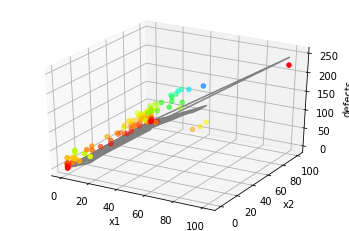

In [63]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = training_predictions
x_line = X_train1
y_line = X_train2
ax.plot3D(x_line, y_line, z_line, 'grey')
z_points = y_train
x_points = X_train1
y_points = X_train2
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('defects')

plt.show()